In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('universal_top_spotify_songs.csv')

In [3]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2025-03-07,96,False,...,6,-7.777,0,0.0304,0.3080,0.0000,0.122,0.535,157.969,3
1,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",2,0,0,NaN,2025-03-07,89,False,...,2,-7.546,1,0.1250,0.2510,0.0000,0.248,0.576,138.008,4
2,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",3,0,0,NaN,2025-03-07,87,False,...,0,-4.477,0,0.2600,0.0283,0.0000,0.355,0.939,149.027,4
3,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,4,0,0,NaN,2025-03-07,93,False,...,2,-10.171,1,0.0358,0.2000,0.0608,0.117,0.438,104.978,4
4,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,5,0,0,NaN,2025-03-07,92,True,...,1,-7.001,1,0.0776,0.0107,0.0000,0.141,0.214,101.061,4


In [4]:
len(df)

1793225

In [15]:
df.dtypes

spotify_id             object
name                   object
artists                object
daily_rank              int64
daily_movement          int64
weekly_movement         int64
country                object
snapshot_date          object
popularity              int64
is_explicit              bool
duration_ms             int64
album_name             object
album_release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
dtype: object

In [4]:
df.isnull().sum()

spotify_id                0
name                     30
artists                  29
daily_rank                0
daily_movement            0
weekly_movement           0
country               24507
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              821
album_release_date      658
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [5]:
df_cleaned = df.dropna(subset=['country', 'name', 'artists'])

In [6]:
print(df_cleaned.isnull().sum())
print(len(df_cleaned))
print(len(df) - len(df_cleaned))

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name            784
album_release_date    622
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64
1768688
24537


In [9]:
df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo']].describe()

,danceability,energy,loudness,acousticness,instrumentalness,tempo
count,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06
mean,6.786273e-01,6.486645e-01,-6.662341e+00,2.743854e-01,2.112079e-02,1.221689e+02
std,1.417729e-01,1.673926e-01,3.483709e+00,2.510631e-01,1.068065e-01,2.801797e+01
min,0.000000e+00,2.010000e-05,-5.434100e+01,3.450000e-06,0.000000e+00,0.000000e+00
25%,5.830000e-01,5.510000e-01,-7.807000e+00,6.700000e-02,0.000000e+00,1.000190e+02
50%,7.010000e-01,6.680000e-01,-6.038000e+00,1.890000e-01,1.280000e-06,1.199600e+02
75%,7.820000e-01,7.650000e-01,-4.714000e+00,4.370000e-01,8.790000e-05,1.400700e+02
max,9.880000e-01,9.980000e-01,3.233000e+00,9.960000e-01,9.950000e-01,2.360890e+02


In [10]:
df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo']].skew()

danceability       -0.595037
energy             -0.667099
loudness           -4.175459
acousticness        0.946835
instrumentalness    6.621589
tempo               0.480197
dtype: float64

In [11]:
df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo']].kurt()

danceability         0.157572
energy               0.588021
loudness            33.656521
acousticness        -0.106841
instrumentalness    46.732853
tempo               -0.256450
dtype: float64

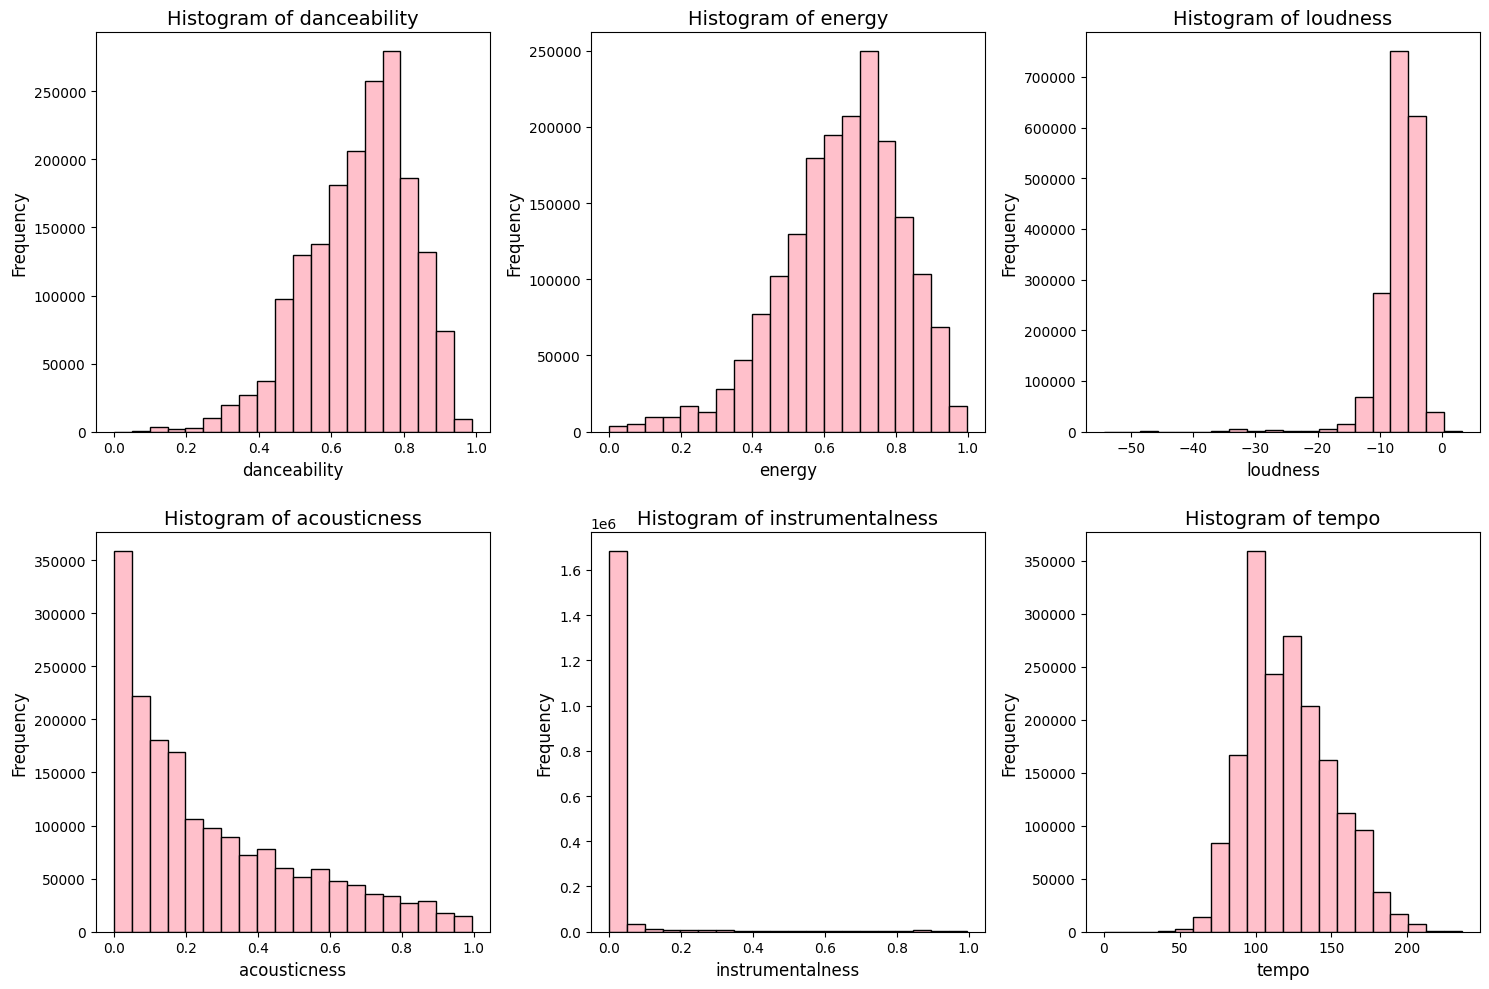

In [26]:
import matplotlib.pyplot as plt

# Odaberi kolone koje želiš da prikažeš
columns_of_interest = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo']

# Podesi broj redova i kolona za subgrapike
n_cols = 3  # Broj kolona (3 kolone)
n_rows = 2  # Broj redova (2 reda) - za 6 atributa, biće 2x3 (2 reda, 3 kolone)

# Podesi veličinu grafika
plt.figure(figsize=(15, 10))

# Iteriraj kroz kolone i crtaj histograme za svaki atribut
for i, column in enumerate(columns_of_interest):
    plt.subplot(n_rows, n_cols, i+1)  # Pozicija subplot-a
    plt.hist(df[column], bins=20, color='pink', edgecolor='black')  # Histogram za svaki atribut
    plt.title(f'Histogram of {column}', fontsize=14)  # Naslov za svaki histogram
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Poboljšaj raspored kako bi se grafikoni lepo prikazali
plt.tight_layout()

# Prikazivanje grafikaa
plt.show()


In [38]:
from sklearn.preprocessing import MinMaxScaler
# Postavljanje željenog opsega: normalizacija u opsegu [-1, 1] na primer za temperaturu, vizualizaciju...
#scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = MinMaxScaler()

# Primena Min-Max normalizacije samo na odabrane kolone
df_normalizacija = df.copy()
df_normalizacija[columns_of_interest] = scaler.fit_transform(df_normalizacija[columns_of_interest])
df_normalizacija[columns_of_interest].describe()

,danceability,energy,loudness,acousticness,instrumentalness,tempo
count,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06
mean,6.868697e-01,6.499574e-01,8.281283e-01,2.754848e-01,2.122693e-02,5.174699e-01
std,1.434949e-01,1.677314e-01,6.050838e-02,2.520722e-01,1.073433e-01,1.186755e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.900810e-01,5.520952e-01,8.082468e-01,6.726585e-02,0.000000e+00,4.236496e-01
50%,7.095142e-01,6.693320e-01,8.389725e-01,1.897562e-01,1.286432e-06,5.081135e-01
75%,7.914980e-01,7.665284e-01,8.619689e-01,4.387531e-01,8.834171e-05,5.932932e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [36]:
print("MAX:", scaler.data_max_)
print("MIN:", scaler.data_min_)

MAX: [  0.988   0.998   3.233   0.996   0.995 236.089]
MIN: [ 0.0000e+00  2.0100e-05 -5.4341e+01  3.4500e-06  0.0000e+00  0.0000e+00]


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardizacija = df.copy()

scaler.fit(df_standardizacija[columns_of_interest])
print("MEAN: ", scaler.mean_)  # srednje vrednosti za svaku kolonu
print("STDEV: ", scaler.scale_) # standardne devijacije za svaku kolonu

df_standardizacija[columns_of_interest] = scaler.transform(df_standardizacija[columns_of_interest])
df_standardizacija[columns_of_interest].describe()

MEAN:  [ 6.78627267e-01  6.48664516e-01 -6.66234122e+00  2.74385391e-01
  2.11207921e-02  1.22168940e+02]
STDEV:  [ 0.14177287  0.16739252  3.48370828  0.25106299  0.10680651 28.01796105]


,danceability,energy,loudness,acousticness,instrumentalness,tempo
count,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06,1.793225e+06
mean,2.840229e-16,-7.668619e-16,-1.663563e-16,-1.541839e-16,2.434482e-17,-2.637356e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.786722e+00,-3.874991e+00,-1.368618e+01,-1.092881e+00,-1.977482e-01,-4.360379e+00
25%,-6.745103e-01,-5.834461e-01,-3.285748e-01,-8.260293e-01,-1.977482e-01,-7.905622e-01
50%,1.578069e-01,1.155098e-01,1.792174e-01,-3.400955e-01,-1.977362e-01,-7.884014e-02
75%,7.291432e-01,6.949862e-01,5.592722e-01,6.477044e-01,-1.969252e-01,6.389137e-01
max,2.182172e+00,2.086924e+00,2.840462e+00,2.874237e+00,9.118163e+00,4.065965e+00


In [72]:
# pozitivan skewness mozemo popraviti koristeci logaritamsku funkciju, ali zavisi od distribucije podataka i mozda nije dovoljna
df_skrewCorrection = df.copy()
df_skrewCorrection['acousticness'] = np.log(df['acousticness'] + 1)
print(df[['acousticness']].skew())
print(df_skrewCorrection[['acousticness']].skew())

acousticness    0.946835
dtype: float64
acousticness    0.690193
dtype: float64


In [85]:
# Diskretizacija prema jednakoj širini (Equal-width binning)
num_bins =5
bins = np.linspace(df['acousticness'].min(), df['acousticness'].max(), num_bins + 1) # generisanje niza brojeva raspoređenih u jednake intervale između početne i krajnje vrednosti
                                                                                    # +1 jer linespace generise granice za te beanove, nama treba 6 granica da bismo imali 5 intervala
#bins, step = np.linspace(df['acousticness'].min(), df['acousticness'].max(), num=num_bins + 1, retstep=True)
#print(bins)
#print(df['acousticness'].min())
#print("Korak:", step)

df['acousticness_binned_equal_width'] = pd.cut(df['acousticness'], bins=bins, labels=[f'Bin {i+1}' for i in range(num_bins)]) # labels=False
                                                                                                                              # right=True: intervali su desno zatvoreni, tj. uključuju krajnju vrednost (granica sa desne strane)
print(df[['acousticness', 'acousticness_binned_equal_width']].head(20))

    acousticness acousticness_binned_equal_width
0        0.30800                           Bin 2
1        0.25100                           Bin 2
2        0.02830                           Bin 1
3        0.20000                           Bin 2
4        0.01070                           Bin 1
5        0.17700                           Bin 1
6        0.21400                           Bin 2
7        0.00289                           Bin 1
8        0.19200                           Bin 1
9        0.06120                           Bin 1
10       0.39900                           Bin 3
11       0.11000                           Bin 1
12       0.61200                           Bin 4
13       0.05270                           Bin 1
14       0.08370                           Bin 1
15       0.09050                           Bin 1
16       0.68200                           Bin 4
17       0.01210                           Bin 1
18       0.13100                           Bin 1
19       0.15100    

In [86]:
# Diskretizacija prema jednakoj frekvenciji (Equal-frequency binning) - formira jednake binove sa isto brojem podataka u svakom binu
num_bins = 5

# 'pd.qcut()' koristi kvantilnu podelu da raspodeli podatke u jednak broj podataka u svakom binu
# svaki bin će imati približno isti broj podataka
# ali intervali (bini) mogu imati različite širine.
df['acousticness_binned_equal_freq'] = pd.qcut(df['acousticness'], q=num_bins, labels=[f'Bin {i+1}' for i in range(num_bins)])

print(df[['acousticness', 'acousticness_binned_equal_freq']].head(20))

    acousticness acousticness_binned_equal_freq
0        0.30800                          Bin 4
1        0.25100                          Bin 3
2        0.02830                          Bin 1
3        0.20000                          Bin 3
4        0.01070                          Bin 1
5        0.17700                          Bin 3
6        0.21400                          Bin 3
7        0.00289                          Bin 1
8        0.19200                          Bin 3
9        0.06120                          Bin 2
10       0.39900                          Bin 4
11       0.11000                          Bin 2
12       0.61200                          Bin 5
13       0.05270                          Bin 2
14       0.08370                          Bin 2
15       0.09050                          Bin 2
16       0.68200                          Bin 5
17       0.01210                          Bin 1
18       0.13100                          Bin 2
19       0.15100                        

In [7]:
df_cleaned['country'].unique()

array(['ZA', 'VN', 'VE', 'UY', 'US', 'UA', 'TW', 'TR', 'TH', 'SV', 'SK',
       'SG', 'SE', 'SA', 'RO', 'PY', 'PT', 'PL', 'PK', 'PH', 'PE', 'PA',
       'NZ', 'NO', 'NL', 'NI', 'NG', 'MY', 'MX', 'MA', 'LV', 'LU', 'LT',
       'KZ', 'KR', 'JP', 'IT', 'IS', 'IN', 'IL', 'IE', 'ID', 'HU', 'HN',
       'HK', 'GT', 'GR', 'FR', 'FI', 'ES', 'EG', 'EE', 'EC', 'DO', 'DK',
       'DE', 'CZ', 'CR', 'CO', 'CL', 'CH', 'CA', 'BY', 'BR', 'BO', 'BG',
       'BE', 'AU', 'AT', 'AR', 'AE', 'GB'], dtype=object)

In [28]:
south_hemisphere = {'ZA', 'UY', 'PY', 'PE', 'NZ', 'ID', 'EC', 'CO', 'CL', 'BR', 'BO', 'AU', 'AR'}
north_hemisphere = {'VN', 'VE', 'US', 'UA', 'TW', 'TR', 'TH', 'SV', 'SK', 'SG', 'SE', 'SA', 'RO',
    'PT', 'PL', 'PK', 'PH', 'PA', 'NO', 'NL', 'NI', 'NG', 'MY', 'MX', 'MA', 'LV',
    'LU', 'LT', 'KZ', 'KR', 'JP', 'IT', 'IS', 'IN', 'IL', 'IE', 'HU', 'HN', 'HK',
    'GT', 'GR', 'FR', 'FI', 'ES', 'EG', 'EE', 'DO', 'DK', 'DE', 'CZ', 'CR', 'CH',
    'CA', 'BY', 'BG', 'BE', 'AT', 'AE', 'GB'}
def define_hemisphere(country_code):
    if country_code in north_hemisphere:
        return 'N'
    elif country_code in south_hemisphere:
        return 'S'
    else:
        return "null"

def define_season(country, date_str):
    hemisphere = define_hemisphere(country)
    date = datetime.strptime(date_str, "%Y-%m-%d")
    month = date.month
    if hemisphere == 'N':
        if month in [12,1,2]:
            return 'winter'
        elif month in [3,4,5]:
            return 'spring'
        elif month in [6,7,8]:
            return 'summer'
        else:
            return 'autumn'
    elif hemisphere == 'S':
        if month in [12,1,2]:
            return 'summer'
        elif month in [3,4,5]:
            return 'autumn'
        elif month in [6,7,8]:
            return 'winter'
        else:
            return 'spring'
    else:
        return "null"

In [29]:
#! pip install datetime
from datetime import datetime

In [35]:
df_add = df_cleaned.copy()
df_add['season'] = df_cleaned.apply(lambda row: define_season(row['country'], row['snapshot_date']), axis=1)

In [36]:
df_add['season'] = df_add['season'].replace({pd.NA: np.nan})
df_add['season'] = df_add['season'].replace('null', np.nan)

In [37]:
df_add_cleaned = df_add.copy()

In [39]:
df_add['season'].unique()

array(['autumn', 'spring', 'summer', 'winter'], dtype=object)

In [38]:
df_add['season'].value_counts()

season
winter    569946
autumn    447684
summer    384449
spring    366609
Name: count, dtype: int64

In [16]:
df_add[['season']]

,season
50,autumn
51,autumn
52,autumn
53,autumn
54,autumn
...,...
1793220,autumn
1793221,autumn
1793222,autumn
1793223,autumn


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_add['season_encoded'] = label_encoder.fit_transform(df_add['season'])
df_add[['season', 'season_encoded']]

,season,season_encoded
50,autumn,0
51,autumn,0
52,autumn,0
53,autumn,0
54,autumn,0
...,...,...
1793220,autumn,0
1793221,autumn,0
1793222,autumn,0
1793223,autumn,0


In [20]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapiranje između klasa i numeričkih vrednosti:", mapping)

Mapiranje između klasa i numeričkih vrednosti: {'autumn': 0, 'spring': 1, 'summer': 2, 'winter': 3}


In [22]:
# ako hocemo da sami definisemo poredak prilikom enkodiranja
from sklearn.preprocessing import OrdinalEncoder
season_order = ['winter', 'spring', 'summer', 'autumn']

ordinal_encoder = OrdinalEncoder(categories=[season_order])

df_add['season_encoded_ord'] = ordinal_encoder.fit_transform(df_add[['season']])

df_add[['season', 'season_encoded_ord']]

,season,season_encoded_ord
50,autumn,3.0
51,autumn,3.0
52,autumn,3.0
53,autumn,3.0
54,autumn,3.0
...,...,...
1793220,autumn,3.0
1793221,autumn,3.0
1793222,autumn,3.0
1793223,autumn,3.0


In [25]:
print(ordinal_encoder.categories_)

[array(['winter', 'spring', 'summer', 'autumn'], dtype=object)]


In [26]:
mapping = dict(zip(ordinal_encoder.categories_[0], range(len(ordinal_encoder.categories_[0]))))
print("Mapiranje između klasa i numeričkih vrednosti:", mapping)

Mapiranje između klasa i numeričkih vrednosti: {'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3}


In [ ]:
# one-hot-encoding

In [27]:
# I nacin 
df_encoded = pd.get_dummies(df_add['season'], prefix='season') # Na primer, za season = 'winter', biće kreirana kolona season_winter sa vrednostima 1 ili 0.
df_add = pd.concat([df_add, df_encoded], axis=1)
df_add.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,valence,tempo,time_signature,season,season_encoded,season_encoded_ord,season_autumn,season_spring,season_summer,season_winter
50,7Ez1p7fKxXISiD4bEwo57E,What If? (Mngani),Yanga Chief,1,0,11,ZA,2025-03-07,48,True,...,0.617,86.743,5,autumn,0,3.0,True,False,False,False
51,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",2,0,0,ZA,2025-03-07,89,False,...,0.576,138.008,4,autumn,0,3.0,True,False,False,False
52,0DGP0pRR8yz4OW2xxjIskt,Vuma Dlozi Lami (feat. Ancestral Rituals),"Issa sisdoh, Ancestral Rituals",3,1,4,ZA,2025-03-07,57,False,...,0.759,117.988,4,autumn,0,3.0,True,False,False,False
53,2tUXE87QNnoVQZApV3uyVZ,Ngisakuthanda,"Zee Nxumalo, TBO, PYY Logdrum King, DJ Tearz, ...",4,2,7,ZA,2025-03-07,54,False,...,0.546,112.998,4,autumn,0,3.0,True,False,False,False
54,1F3J7D5byxTWbEyhpizptk,Uyaphapha Marn (feat. Scotts Maphuma & Kabelo ...,"TNK MusiQ, DJ Maphorisa, Seun1401, Scotts Maph...",5,5,-2,ZA,2025-03-07,57,False,...,0.395,113.003,4,autumn,0,3.0,True,False,False,False


In [42]:
df_add_cleaned['season'].unique()

array(['autumn', 'spring', 'summer', 'winter'], dtype=object)

In [44]:
# II nacin
from sklearn.preprocessing import OneHotEncoder


In [48]:
# ciklicno enkodiranje
df_add = df_add_cleaned.copy()
season_map = {'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3}
df_add['season_num'] = df_add['season'].map(season_map)

# Ciklično enkodiranje: primena sin i cos funkcija
df_add['season_sin'] = np.sin(2 * np.pi * df_add['season_num'] / 4)
df_add['season_cos'] = np.cos(2 * np.pi * df_add['season_num'] / 4)

df_add[['season', 'season_sin', 'season_cos']].drop_duplicates()

,season,season_sin,season_cos
50,autumn,-1.000000e+00,-1.836970e-16
100,spring,1.000000e+00,6.123234e-17
25245,summer,1.224647e-16,-1.000000e+00
25295,winter,0.000000e+00,1.000000e+00


In [49]:
print(df_add['season_sin'].unique())
print(df_add['season_cos'].unique())


[-1.0000000e+00  1.0000000e+00  1.2246468e-16  0.0000000e+00]
[-1.8369702e-16  6.1232340e-17 -1.0000000e+00  1.0000000e+00]


In [50]:
# Binary Encoding - kombinuje elemente Label Encoding i One-Hot Encoding
# 1. Dodeljujemo brojeve kategorijama, kao što to radimo kod Label Encoding.
# 2. Pretvaramo te brojeve u binarni format.
# 3. Podeljujemo binarne brojeve na više kolona, tako da svaka kolona sadrži jednu cifru iz binarnog broja.

#!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 912.7 kB/s eta 0:00:00B/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 3.7 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 5.0 MB/s eta 0:00:00m eta 0:00:010:0101


In [53]:
df_add = df_add_cleaned.copy()
season_map = {'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3}
df_add['season_num'] = df_add['season'].map(season_map)

df_add['season_bin'] = df_add['season_num'].apply(lambda x: format(x, '02b'))  # '02b' daje binarni broj sa 2 bita

# Razdvajanje binarnih brojeva u dve kolone (svaka cifra ide u novu kolonu)
df_add['season_0'] = df_add['season_bin'].apply(lambda x: int(x[0]))  # Prva cifra (nula ili jedan)
df_add['season_1'] = df_add['season_bin'].apply(lambda x: int(x[1]))  # Druga cifra (nula ili jedan)

# Prikaz rezultata
print(df_add[['season', 'season_num', 'season_bin', 'season_0', 'season_1']].drop_duplicates())

       season  season_num season_bin  season_0  season_1
50     autumn           3         11         1         1
100    spring           1         01         0         1
25245  summer           2         10         1         0
25295  winter           0         00         0         0


In [ ]:
# II nacin 
# import category_encoders as ce
# encoder = ce.BinaryEncoder(cols=['season'])

In [6]:
columns_of_interest = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo']
df[columns_of_interest].var()

danceability          0.020100
energy                0.028020
loudness             12.136230
acousticness          0.063033
instrumentalness      0.011408
tempo               785.006579
dtype: float64